<a href="https://colab.research.google.com/github/chrisbrierley20/chrisbrierley20.github.io/blob/main/Stock_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
abnb = yf.Ticker("ABNB").history(period='1y')
brdcy = yf.Ticker("BRDCY").history(period='1y')
ko = yf.Ticker("KO").history(period='1y')
intc = yf.Ticker("INTC").history(period='1y')
pcrfy = yf.Ticker("PCRFY").history(period='1y')
pg = yf.Ticker("PG").history(period='1y')
tm = yf.Ticker("TM").history(period='1y')
v = yf.Ticker("V").history(period='1y')

In [ ]:
dfs=[]
for x in ['ABNB','BRDCY','KO','INTC','PCRFY','PG','TM','V']:
  df = yf.Ticker(x).history(period='1y')
  df=df[['Close']]
  df['Name']=x
  dfs.append(df)

In [ ]:
dfs[0].head(2)

,Close,Name
Date,,
2020-12-10,144.710007,ABNB
2020-12-11,139.250000,ABNB


In [ ]:
import pandas as pd
pd.concat([ dfs[0],dfs[1] ])

,Close,Name
Date,,
2020-12-10,144.710007,ABNB
2020-12-11,139.250000,ABNB
2020-12-14,130.000000,ABNB
2020-12-15,124.800003,ABNB
2020-12-16,137.990005,ABNB
...,...,...
2021-11-29,20.299999,BRDCY
2021-11-30,19.959999,BRDCY
2021-12-01,20.090000,BRDCY


In [ ]:
pd.concat(dfs)

,Close,Name
Date,,
2020-12-10,144.710007,ABNB
2020-12-11,139.250000,ABNB
2020-12-14,130.000000,ABNB
2020-12-15,124.800003,ABNB
2020-12-16,137.990005,ABNB
...,...,...
2021-11-30,193.770004,V
2021-12-01,190.160004,V
2021-12-02,198.289993,V


In [ ]:
dfz=pd.DataFrame()
for x in dfs:
  stock_name=x['Name'].values[0]
  stock_name=stock_name.replace('.','')
  x=x[['Close']]
  x.columns=[stock_name]
  dfz=x.join(dfz)
dfz.head()  

,V,TM,PG,PCRFY,INTC,KO,BRDCY,ABNB
Date,,,,,,,,
2020-12-07,211.351730,138.149994,134.302017,10.99,48.931232,51.370483,17.740000,NaN
2020-12-08,211.470993,138.740005,134.662949,11.03,49.408840,51.554676,17.680000,NaN
2020-12-09,208.300461,140.880005,133.063171,11.31,48.804516,51.700096,17.660000,NaN
2020-12-10,206.342499,143.070007,132.185257,11.29,48.989712,51.428650,17.700001,144.710007
2020-12-11,204.980865,151.000000,133.160706,11.23,48.473110,51.719482,17.590000,139.250000


In [ ]:
dfz.dropna(subset = ["KO"], inplace=True)

In [ ]:
dfz

,V,TM,PG,PCRFY,INTC,KO,BRDCY,ABNB
Date,,,,,,,,
2020-12-07,211.351730,138.149994,134.302017,10.99,48.931232,51.370483,17.740000,NaN
2020-12-08,211.470993,138.740005,134.662949,11.03,49.408840,51.554676,17.680000,NaN
2020-12-09,208.300461,140.880005,133.063171,11.31,48.804516,51.700096,17.660000,NaN
2020-12-10,206.342499,143.070007,132.185257,11.29,48.989712,51.428650,17.700001,144.710007
2020-12-11,204.980865,151.000000,133.160706,11.23,48.473110,51.719482,17.590000,139.250000
...,...,...,...,...,...,...,...,...
2021-11-29,196.289993,177.470001,149.020004,11.31,50.000000,54.160000,20.299999,180.080002
2021-11-30,193.770004,177.850006,144.580002,10.90,49.200001,52.450001,19.959999,172.539993
2021-12-01,190.160004,178.289993,146.399994,10.87,48.599998,52.299999,20.090000,163.080002


In [ ]:
dfz.to_csv('sponsor_stocks.csv')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

In [ ]:
stocks=pd.read_csv('sponsor_stocks.csv')
stocks.head(2)

,Date,V,TM,PG,PCRFY,INTC,KO,BRDCY,ABNB
0,2020-12-07,211.351730,138.149994,134.302017,10.99,48.931232,51.370483,17.74,NaN
1,2020-12-08,211.470993,138.740005,134.662949,11.03,49.408840,51.554676,17.68,NaN


In [ ]:
import seaborn as sns
sns.set()

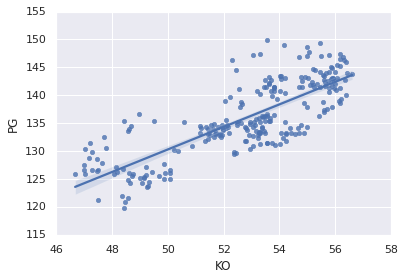

In [ ]:
sns.regplot(x='KO',y='PG',data=stocks)

In [ ]:
from scipy.stats import linregress

In [ ]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=stocks.dropna()['KO'], y=stocks.dropna()['PG'])

In [ ]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  2.02  * x +  29.26
R² =  0.63
